# Problem 2 (100 points)

This problem is about the basics of neural network.

Before starting this problem, make sure to run the following code first **without change**:

In [1]:
""" DO NOT CHANGE """
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
torch.manual_seed(2025)

> WARNING !!!


- Beyond importing libraries/modules/classes/functions in the preceding cell, you are **NOT allowed to import anything else for the following purposes**:
    - **As a part of your final solution.** For instance, if a problem asks you to build a model without using sklearn but you use it, then you will not earn points.
    - **Temporarily import something to assist you to get a solution.** For instance, if a problem asks you to manually compute eigenvalues but you temporarily use `np.linalg.eig` to get an answer and then delete your code, then you violate the rule.

    **Rule of thumb:** Each part has its particular purpose to intentionally test you something. Do not attempt to find a shortcut to circumvent the rule.

- All coding tasks shall run on CPUs, **not GPUs**.

## Part 1 (5 points, non-coding task)

The high level idea of affine transformation in math is that for each column vector $\mathbf{x} \in \Bbb R^N$, an affine transformation maps it to another column vector $\mathbf{y} \in \Bbb R^M$ via

$$
\mathbf{y} = \mathbf{W} \mathbf{x} + \mathbf{b} ,
$$

where

- $\mathbf{W} \in \Bbb R^{M \times N}$.
- $\mathbf{b} \in \Bbb R^{M}$.

Now, let us study a small-sized problem.

Let

$$
\mathbf{W} = \begin{bmatrix} 2 & -3 & 1 & 3 & -2 \\ 0 & 1 & 2 & 5 & -1 \\ 7 & -1 & -3 & 7 & 0 \end{bmatrix}
$$

and

$$
\mathbf{b} = \begin{bmatrix} 1 \\ 0 \\ -1 \end{bmatrix}
$$

and

$$
\mathbf{x} = \begin{bmatrix} 1 \\ 2 \\ -3 \\ 1 \\ -2 \end{bmatrix}
$$

Answer the following questions:

1. What is the value of $N$?
2. What is the value of $M$?
3. What is the value of $\mathbf{y}$?

Questions 1 and 2 do not require reasoning. Question 3 requires reasoning.

\#\#\# WRITE YOUR SOLUTION HERE ###

1. $N$ is the number of columns in $\mathbf{W}$, $N=5$.
2. $M$ is the number of rows in $\mathbf{W}$, $M=3$.
3. We have
   $$
    \begin{aligned}
    \mathbf{y} &= \mathbf{W} \mathbf{x} + \mathbf{b} \\
               &= \begin{bmatrix} 2 & -3 & 1 & 3 & -2 \\ 0 & 1 & 2 & 5 & -1 \\ 7 & -1 & -3 & 7 & 0 \end{bmatrix} \begin{bmatrix} 1 \\ 2 \\ -3 \\ 1 \\ -2 \end{bmatrix} + \begin{bmatrix} 1 \\ 0 \\ -1 \end{bmatrix} \\
               &= \begin{bmatrix} 2\cdot1+(-3)\cdot2+1\cdot(-3)+3\cdot1+(-2)\cdot(-2) \\  0\cdot1+1\cdot2+2\cdot(-3)+5\cdot1+(-1)\cdot(-2) \\ 7\cdot1+(-1)\cdot2+(-3)\cdot(-3)+7\cdot1+0\cdot(-2) \end{bmatrix} + \begin{bmatrix} 1 \\ 0 \\ -1 \end{bmatrix} \\
               &= \begin{bmatrix} 0+1 \\ 3+0 \\ 21+(-1) \end{bmatrix} \\
               &= \begin{bmatrix} 1 \\ 3 \\ 20 \end{bmatrix}.
    \end{aligned}
   $$

""" END OF THIS PART """

## Part 2 (10 points, non-coding task)

Define $\nabla_{\mathbf{z}} \ f\left( \mathbf{z} \right)$ to be the gradient of function $f$ with respect to vector/matrix $\mathbf{z}$.

**Compute the following gradients. Reasoning is required.**

1. $\nabla_{\mathbf{x}} \ \mathbf{y}$. \
   The final answer should be in a matrix form.
2. $\nabla_{\mathbf{w}} \ \mathbf{y}$. \
   The final answer should be in an element-wise form.
3. $\nabla_{\mathbf{b}} \ \mathbf{y}$. \
   The final answer should be in a matrix form.

\#\#\# WRITE YOUR SOLUTION HERE ###

Each component of the vector $\mathbf{y}$ can be written as

$$
\mathbf{y}_i = \sum_j^N \mathbf{W}_{ij}\mathbf{x}_j + \mathbf{b}_i \quad \text{for}\ i = 1,2,\cdots,M .
$$

1. Element-wise,
   $$ [\nabla_{\mathbf{x}} \ \mathbf{y}]_{pq} = \frac{\partial \mathbf{y}_p}{\partial \mathbf{x}_q} = \mathbf{W}_{pq}.$$
   So, $\nabla_{\mathbf{x}} \ \mathbf{y}$ is just $\mathbf{W}$.

2. Element-wise,
   $$ [\nabla_{\mathbf{W}} \ \mathbf{y}]_{pqr} = \frac{\partial \mathbf{y}_p}{\partial \mathbf{W}_{qr}} = \begin{cases} x_r &\text{if}\ p=q \\ 0 &\text{if}\ p \ne q\end{cases}$$
   where $\nabla_{\mathbf{W}} \ \mathbf{y} \in \Bbb R^{M \times M \times N}$.

   The official answer gives the equivalent expression: $\mathbf{x}_r \delta_{pq}$ where $\delta_{pq}$ is the **Kronecker delta**. It carries the same meaning as the piecewise function above.

3. Element-wise,
   $$ [\nabla_{\mathbf{b}} \ \mathbf{y}]_{pq} = \frac{\partial \mathbf{y}_p}{\partial \mathbf{b}_q} = \mathbf{I}_{pq}.$$
   Therefore, $\nabla_{\mathbf{b}} \ \mathbf{y} = \mathbf{I}_{M \times M}$.
   
""" END OF THIS PART """

## Part 3 (10 points, coding task)

In this part, you are asked to build an affine transformation module from scratch by using **NumPy, NOT PyTorch or TensorFlow**.

**Define such a class as `My_Linear_NumPy`.**

- Attributes
    - `in_features`: Number of input features
    - `out_features`: Number of output features
    - `weight`: This refers to matrix $\mathbf{W}$ in Part 1. The shape is `(out_features, in_features)`.
    - `bias`: This refers to vector $\mathbf{b}$ in Part 1. The shape is `(out_features,)`.
    - `random_seed`: The NumPy random seed number used to generate initial values of `weight` and `bias`.
- Method `__init__`:
    - To initialize an object in this class, you need to specify `in_features` and `out_features`.
    - You may initialize the object by specifying a value for `random_seed`. If it is not specified, then its default value is 42.
    - The initial values of `weight` and `bias` are random that follow standard normal distributions generated with the seed number attribute `random_seed`.
- Method `forward`: 
    - Input `x`: numpy array with shape `(n_0, n_1, ..., n_{d-1}, in_features)` with an arbitrary dimension $d=0,1,\cdots$.
    - Output `y`: numpy array with shape `(n_0, n_1, ..., n_{d-1}, out_features)`.
    - The affine transformation works in a way that given the first $d$ indices in `x` and `y`, it does affine transformation along the last axis of `x` and `y`.
- **Do not use any loop in your code.**

\#\#\# WRITE YOUR SOLUTION HERE ###

| Vector/Matrix | Shape |
| --- | --- |
| $\mathbf{x}$ | `(..., in_features)` |
| $\mathbf{W}$ | `(out_features, in_features)` |
| $\mathbf{b}$ | `(out_features,)` |
| $\mathbf{xW}^\top$ | `(..., out_features)` |
| $\mathbf{xW}^\top + \mathbf{b}$ | `(..., out_features)` |

Note: $\mathbf{b}$ conceptually reshapes to `(1, ..., 1, out_features)` and then broadcasts to match the full shape `(..., out_features)`.

In [2]:
class My_Linear_NumPy:
    def __init__(self, in_features, out_features, random_seed=42):
        self.in_features = in_features
        self.out_features = out_features
        self.random_seed = random_seed
        self.weight = np.random.normal(size=(out_features, in_features))
        self.bias = np.random.normal(size=(out_features, ))

    def forward(self, x):
        return x @ self.weight.T + self.bias

""" END OF THIS PART """

## Part 4 (5 points, coding task)

**Do the following tasks in this part.**

1. Construct an object in the class `My_Linear_Numpy` called `linear_model_np`.
2. Set `in_features = 3` and `out_features = 5`.
3. Create multiple `X` with the following different shapes, by common numpy random seed number 2025 and the same standard normal distribution.
   - `(in_features,)`
   - `(10,in_features)`
   - `(10,20,in_features)`
   - `(10,20,30,in_features)`

   After generating `X`, reset the numpy random seed number to its default value.
4. We call our constructed function with each of the above `X` as the input. Print the shape of each output.

\#\#\# WRITE YOUR SOLUTION HERE ###

In [3]:
in_features = 3
out_features = 5
linear_model_np = My_Linear_NumPy(in_features, out_features)

np.random.seed(2025)
Xs = [np.random.normal(size=shape + [in_features]) for shape in ([], [10], [10, 20], [10, 20, 30])]
np.random.seed()

In [4]:
for X in Xs:
    print(linear_model_np.forward(X).shape)

(5,)
(10, 5)
(10, 20, 5)
(10, 20, 30, 5)


""" END OF THIS PART """

## Part 5 (10 points, coding task)

In this part, you are asked to program with **PyTorch, NOT NumPy**.

**Define a deep neural network module (class) named `Linear_Model`.**

It has the following architecture:
- 2 layers: 1 hidden layer and 1 output layer.
- No activation function. That is, the connection between two consecutive layers is only an affine transformation.

\#\#\# WRITE YOUR SOLUTION HERE ###

In [5]:
class Linear_Model(nn.Module):
    def __init__(self, in_features, hidden_features, out_features):
        super().__init__(self)
        self.hidden_layer = nn.Linear(in_features, hidden_features)
        self.out_layer = nn.Linear(hidden_features, out_features)

    def forward(self, x):
        x = self.hidden_layer(x)
        x = self.out_layer(x)
        return x

""" END OF THIS PART """

## Part 6 (5 points, non-coding task)

We make the following modifications on the previous part.

- We consider a special symmetric neural network that `out_features = in_features`.
- No bias in all affine transformations.
- The transformation matrix from the hidden layer to the output layer is binded to be the transpose of the transformation matrix from the input layer to the hidden layer.

**What is the total number of learnable parameters in this model?**

- Reasoning is not required.

\#\#\# WRITE YOUR SOLUTION HERE ###

Referring to the third bullet point, `hidden_layer` and `out_layer` share the same $\mathbf{W}$. Two layers are tied by a single learnable matrix. 

Therefore, the total number of learnable parameters is `in_features * hidden_features`, or equivalently, `hidden_features * out_features`.

""" END OF THIS PART """

## Part 7 (5 points, non-coding task)

This question follows Part 6.

Denote by $\mathbf{W} \in \Bbb R^{\text{hidden\_features} \times \text{in\_features}}$ the transformation matrix from the input layer to the hidden layer.

**Given input $\mathbf{x} \in \Bbb R^{\text{in\_features}}$, write down the formula of the output $\mathbf{y}$ and its shape.**

- Reasoning is not required.

\#\#\# WRITE YOUR SOLUTION HERE ###

| Vector/Matrix | Shape |
| --- | --- |
| $\mathbf{x}$ | `(in_features, )` |
| $\mathbf{W}$ | `(hidden_features, in_features)` |
| $\mathbf{Wx}$ | `(hidden_features, )` |
| $\mathbf{W}^\top\mathbf{Wx}$ | `(in_features, ) == (out_features, )` |

Thus,

$$
\mathbf{y} = \mathbf{W}^\top\mathbf{Wx},
$$

where $\mathbf{y} \in \Bbb R^{\text{out\_features}}$.

""" END OF THIS PART """

## Part 8 (10 points, non-coding task)

This question follows Part 7.

Denote $r = \text{rank} \left( \mathbf{W} \right)$.

**Compute the rank of $\mathbf{W}^\top \mathbf{W}$.**

- Reasoning is required.

\#\#\# WRITE YOUR SOLUTION HERE ###

Suppose $\mathbf{x}\in \ker(\mathbf{W})$ (i.e., $\mathbf{Wx=0}$). Then,

$$
\begin{aligned}
\mathbf{W^\top W x} &= \mathbf{W^\top 0} \\
                    &= \mathbf{0},
\end{aligned}
$$

so $\mathbf{x}\in \ker(\mathbf{W^\top W})$.

Conversely, suppose $\mathbf{x}\in \ker(\mathbf{W^\top W})$. Then, 

$$
\begin{aligned}
                                 \mathbf{W^\top Wx} &= \mathbf{0} \\
\mathbf{\left(x^\top W^\top\right) \left(Wx\right)} &= \mathbf{x^\top 0} \\
      \mathbf{\left(Wx\right)^\top \left(Wx\right)} &= \mathbf{0} &\Longrightarrow \sum_{i} \left(\mathbf{Wx}\right)^2_i = 0 \\
                                       \mathbf{Wx}  &= \mathbf{0},
\end{aligned}
$$

so $\mathbf{x}\in \ker(\mathbf{W})$.

Since $\ker(\mathbf{W}) \subseteq \ker(\mathbf{W^\top W})$ and $\ker(\mathbf{W^\top W}) \subseteq \ker(\mathbf{W})$, we conclude

$$
\ker(\mathbf{W}) = \ker(\mathbf{W^\top W}) \Longleftrightarrow \dim \ker(\mathbf{W}) = \dim \ker(\mathbf{W^\top W}).
$$

By the rank–nullity theorem applied to $\mathbf{W}$, which is of shape $\text{hidden\_features} \times \text{in\_features}$, 

$$
\text{rank}(\mathbf{W}) = \text{in\_features} - \dim \ker(\mathbf W).
$$

> Note: In row-reduced echelon form (RREF), the rank of a matrix is the number of pivot variables, while the nullity ($\dim \ker(\cdot)$) corresponds to the number of free variables. Together, they always sum to the total number of columns of the matrix.

Similarly, for $\mathbf{W^\top W}$, which is $\text{in\_features} \times \text{in\_features}$,

$$
\text{rank}(\mathbf{W^\top W}) = \text{in\_features} - \dim \ker(\mathbf{W^\top W}).
$$

We have shown that $\text{rank}(\mathbf{W}) = \text{rank}(\mathbf{W^\top W}) = r$.

> Alternate approach: The [official solution](https://forum.beaver-edge.ai/t/problem-2-part-8/181/2) uses the Singular Value Decomposition (SVD) of $\mathbf W$ to establish the equality of ranks.

""" END OF THIS PART """

## Part 9 (5 points, coding task)

This question follows Part 6.

In this part, you are asked to program with **PyTorch, not NumPy**.

**Build a deep neural network class named as `Symmetric_Linear_Model` that meets the modifications imposed in Part 6.**

\#\#\# WRITE YOUR SOLUTION HERE ###

In [6]:
class Symmetric_Linear_Model(nn.Module):
    def __init__(self, in_features, hidden_features):
        super().__init__()
        self.layer = nn.Linear(in_features, hidden_features, bias=False)

    def forward(self, x):
        x = self.layer(x)
        x = self.layer.weight.t() @ x
        return x

""" END OF THIS PART """

## Part 10 (5 points, coding task)

Rectified Linear Unit, or the “ReLU”, is one of the most common used function in deep learning. It is defined as

$$
\text{ReLU}(x)= \max \left\{ 0,x \right\} .
$$

In this part, you are asked to use PyTorch to build a ReLU class named `My_ReLU` that subclasses `nn.Module`.

A successful class works in the following ways:

- The initialization of an object in `My_ReLU` does not take any input.
- Suppose we have a `My_ReLU` object called `activiation0`. When we call `activiation0(x)` with input `x` that is a tensor x with an arbitrary dimension and shape, we get an output `y` from the element-wise ReLU acvitivation on `x`.

\#\#\# WRITE YOUR SOLUTION HERE ###

In [7]:
class My_ReLU(nn.Module):
    def __init__(self):
        super().__init__()

    def forward(self, x):
        x = torch.max(torch.zeros_like(x), x)
        return x

""" END OF THIS PART """

## Part 11 (10 points, coding task)

It is known by math that the combination of several linear layers can still be seen as an linear layer, so we can add some non-linear activation functions, such as ReLU, in between to get better effect.

Multi-Layer Perceptron (MLP), is such a neural network composed of multiple fully connected layers with non-linear activations, commonly used in deep learning.

**Please define a class called `My_MLP_Model` that subclasses `nn.Module` and works in the following ways:**

- The architecture consists of two hidden layers and one output layer.
- Each hidden layer consists of an affine transformation module and a ReLU activiation module.
- Each affine transformation module shall be initialized with the build-in class `nn.Linear`.
- Each ReLU activiation nmodule shall be initialized with your self-defined class `My_ReLU`.

\#\#\# WRITE YOUR SOLUTION HERE ###

In [8]:
class My_MLP_Model(nn.Module):
    def __init__(self, in_features, hidden1_features, hidden2_features, out_features):
        super().__init__()
        self.hidden_layer1 = nn.Linear(in_features, hidden1_features)
        self.hidden_layer2 = nn.Linear(hidden1_features, hidden2_features)
        self.out_layer = nn.Linear(hidden2_features, out_features)
        self.relu = My_ReLU()

    def forward(self, x):
        x = self.hidden_layer1(x)
        x = self.relu(x)
        x = self.hidden_layer2(x)
        x = self.relu(x)
        x = self.out_layer(x)
        return x

""" END OF THIS PART """

## Part 12 (5 points, coding task)

After building our deep neural network architecture in Part 11 and before using it to train our model, we need to prepare our training dataset.

Let us look at a simple application of deep neural network in studying harmonic motion in physics.

**Write code to construct the following training dataset:**

- Use `sample_size` to store the number of samples. Set the value as 1000.
- Define `x_train` as a tensor whose shape is `(sample_size,) `and the value on each entry is uniformly drawn between 0 and 1.
- Define `y_train` as a tensor whose values are obtained from the following element-wise mapping from `x_train`:
  $$y = \sin \left( 2 \pi x \right) + 0.1 \cdot \mathcal N \left( 0, 1 \right) ,$$
  where $\mathcal N \left( 0, 1 \right)$ is a standard normal random variable.
- Print the dimensions of `x_train` and `y_train`.
- Print the shapes of `x_train` and `y_train`.

\#\#\# WRITE YOUR SOLUTION HERE ###

In [9]:
sample_size = 1000
x_train = torch.randn(sample_size)
y_train = torch.sin(2 * np.pi * x_train) + 0.1 * torch.randn(x_train.shape)

print(x_train.ndim)
print(y_train.ndim)
print(x_train.shape)
print(y_train.shape)

1
1
torch.Size([1000])
torch.Size([1000])


""" END OF THIS PART """

## Part 13 (15 points, coding task)

**In this part, we use the training dataset constructed in Part 12 to train a model defined in Part 11.**

- Use mean-squred error (MSE) as the loss function.
- Use Adam as the optimization algorithm.
- Do whole-batch training in each epoch.
- After every 10 epochs, print the following sentence:
  
  Epoch: XXX. Loss: XXX.
  
  The loss value should be with 4 decimal places.
- Generate an epoch-MSE loss plot after completing the training. Set the x-label as `epoch` and the y-label as `MSE loss`.

In [10]:
# HYPERPARAMETERS
''' DO NOT CHANGE ANYTHING IN THIS CODE CELL '''

hidden_features1 = 32
hidden_features2 = 16

num_epochs = 500
learning_rate = 1e-3

\#\#\# WRITE YOUR SOLUTION HERE ###

In [11]:
model = My_MLP_Model(1, hidden_features1, hidden_features2, 1)
loss_fn = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
loss_history = []

model.train()
for epoch in range(1, num_epochs + 1):
    pred = model(x_train.reshape(-1, 1))  # First dimension for batch size
    loss = loss_fn(pred, y_train.reshape(-1, 1))

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 10 == 0:
        print(f"Epoch: {epoch}. Loss: {loss.item()}.")
        loss_history.append(loss.item())

Epoch: 10. Loss: 0.5486146807670593.
Epoch: 20. Loss: 0.5121286511421204.
Epoch: 30. Loss: 0.506505012512207.
Epoch: 40. Loss: 0.5046979784965515.
Epoch: 50. Loss: 0.5010021328926086.
Epoch: 60. Loss: 0.49864864349365234.
Epoch: 70. Loss: 0.4969307482242584.
Epoch: 80. Loss: 0.49510782957077026.
Epoch: 90. Loss: 0.4932232201099396.
Epoch: 100. Loss: 0.49132513999938965.
Epoch: 110. Loss: 0.48936229944229126.
Epoch: 120. Loss: 0.48728346824645996.
Epoch: 130. Loss: 0.48502930998802185.
Epoch: 140. Loss: 0.48257073760032654.
Epoch: 150. Loss: 0.4798758625984192.
Epoch: 160. Loss: 0.47691377997398376.
Epoch: 170. Loss: 0.4736510217189789.
Epoch: 180. Loss: 0.47005295753479004.
Epoch: 190. Loss: 0.46611902117729187.
Epoch: 200. Loss: 0.4618365168571472.
Epoch: 210. Loss: 0.45721235871315.
Epoch: 220. Loss: 0.4522338807582855.
Epoch: 230. Loss: 0.44691193103790283.
Epoch: 240. Loss: 0.44123712182044983.
Epoch: 250. Loss: 0.43522024154663086.
Epoch: 260. Loss: 0.42888766527175903.
Epoch: 270

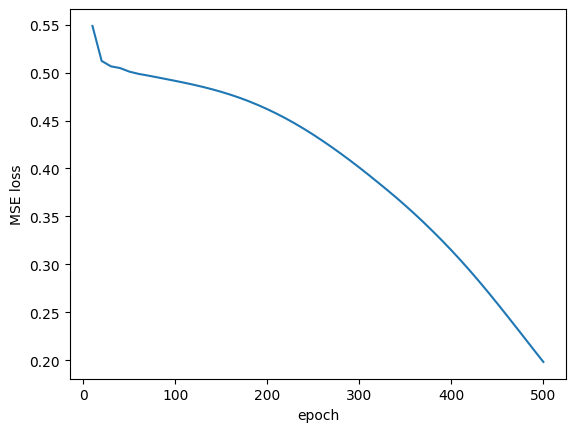

In [12]:
plt.plot(range(10, num_epochs + 1, 10), loss_history)
plt.xlabel("epoch")
plt.ylabel("MSE loss")
plt.show()

""" END OF THIS PART """